# Obesity level estimation 

Dataset attributes:
- FAVC => Frequent consumption of high caloric food

- FCVC => Frequency of consumption of vegetables

- NCP => Number of main meals

- CAEC => Consumption of food between meals

- CH20 => Consumption of water daily

- CALC => Consumption of alcohol

- SCC => Calories consumption monitoring

- FAF => Physical activity frequency

- TUE => Time using technology devices

- MTRANS => Transportation used

- GENDER

- AGE

- HEIGHT

- WEIGHT

- HIST_OVERWEIGHT=> Famil Histry with Obesity

- SMOKE => Does a person smoke or not

- OBESITY_LEVEL(Target Variable) => Shows level of Obesity

In [ ]:
pip install --upgrade scipy networkx 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Default
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import plotly.express as px
import plotly 
import plotly.graph_objects as go
import seaborn as sns

# Data prepocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Tuning parameter
from sklearn.model_selection import GridSearchCV

# Model
#from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# result
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
# import packages
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
# import squarify
# import altair as alt
# #import statsmodels.api as sm

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Reading the file and storing columns seperately
data = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

In [ ]:
data.rename(columns = {'family_history_with_overweight':'HIST_OVERWEIGHT','NObeyesdad':"OBESITY_LEVEL"}, inplace = True)

In [ ]:
# Check the dimensions of the data 
print(data.shape)

# First few rows of the dataset 
data.head()

(2111, 17)


,Gender,Age,Height,Weight,HIST_OVERWEIGHT,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,OBESITY_LEVEL
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           2111 non-null   object 
 1   Age              2111 non-null   float64
 2   Height           2111 non-null   float64
 3   Weight           2111 non-null   float64
 4   HIST_OVERWEIGHT  2111 non-null   object 
 5   FAVC             2111 non-null   object 
 6   FCVC             2111 non-null   float64
 7   NCP              2111 non-null   float64
 8   CAEC             2111 non-null   object 
 9   SMOKE            2111 non-null   object 
 10  CH2O             2111 non-null   float64
 11  SCC              2111 non-null   object 
 12  FAF              2111 non-null   float64
 13  TUE              2111 non-null   float64
 14  CALC             2111 non-null   object 
 15  MTRANS           2111 non-null   object 
 16  OBESITY_LEVEL    2111 non-null   object 
dtypes: float64(8),

In [ ]:
#checking if the any data is missing
data.isnull().sum()

Gender             0
Age                0
Height             0
Weight             0
HIST_OVERWEIGHT    0
FAVC               0
FCVC               0
NCP                0
CAEC               0
SMOKE              0
CH2O               0
SCC                0
FAF                0
TUE                0
CALC               0
MTRANS             0
OBESITY_LEVEL      0
dtype: int64

<Axes: >

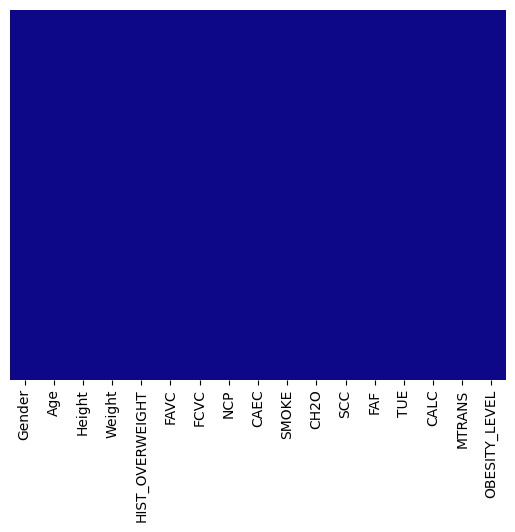

In [ ]:
#Check if there are any missing values 
sns.heatmap(data.isnull(), cbar=False, yticklabels=False, cmap='plasma')

We see from the above result that there is no missing data.


In [ ]:
#Check how many duplicate rows there are 
dup_data = data[data.duplicated()]
print(dup_data.shape)

(24, 17)


We can see that there are 24 duplicate rows, So we drop them

In [ ]:
#Drop duplicates 
df = data.drop_duplicates(keep='last')

## Univariate Analysis


Plotting HISTOGRAMS for all Categorical Attributes

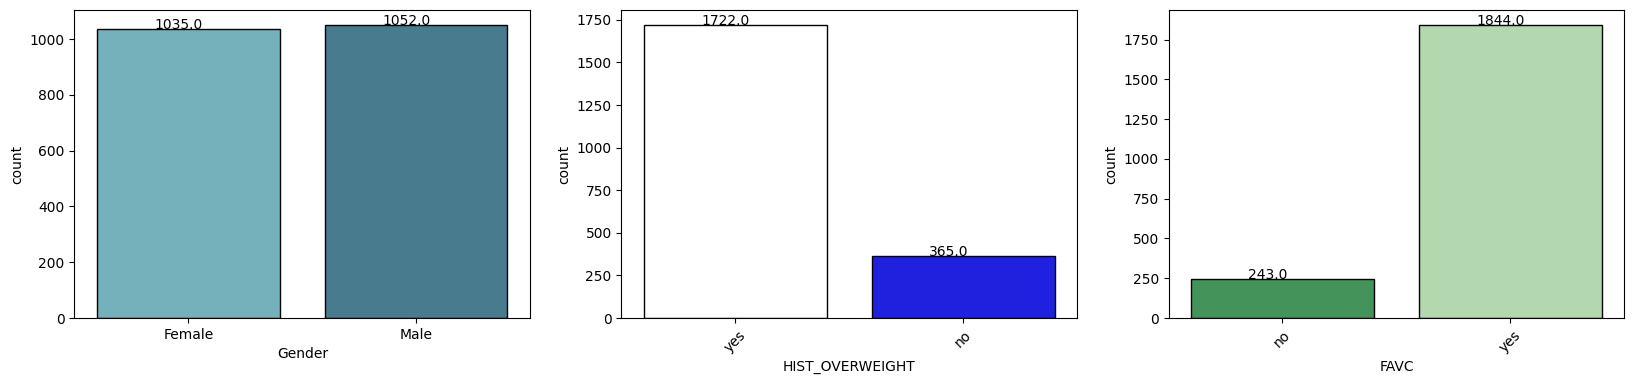

In [ ]:
plt.figure(figsize=(20,4))
plt.subplot(1,3,1)
ax=sns.countplot(x= 'Gender', data = df, palette="GnBu_d",edgecolor="black")
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.subplot(1,3,2)
ax=sns.countplot(x= 'HIST_OVERWEIGHT', data = df, palette="flag",edgecolor="black")
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.xticks(rotation=45)
plt.subplot(1,3,3)
ax=sns.countplot(x= 'FAVC', data = df, palette="Greens_r",edgecolor="black")
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.xticks(rotation=45)
plt.show()

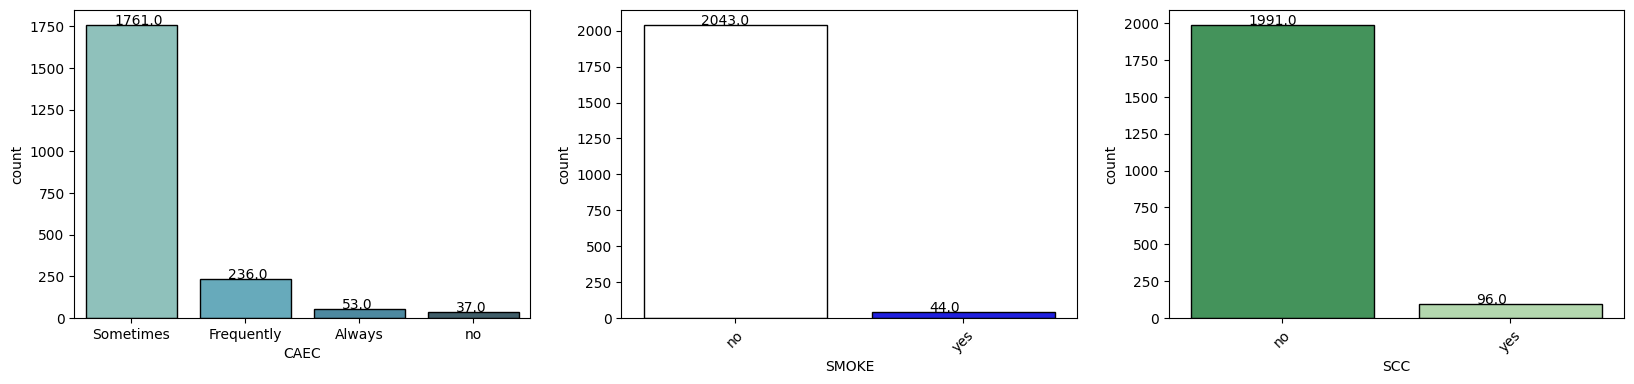

In [ ]:
plt.figure(figsize=(20,4))
plt.subplot(1,3,1)
ax=sns.countplot(x= 'CAEC', data = df, palette="GnBu_d",edgecolor="black")
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.subplot(1,3,2)
ax=sns.countplot(x= 'SMOKE', data = df, palette="flag",edgecolor="black")
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.xticks(rotation=45)
plt.subplot(1,3,3)
ax=sns.countplot(x= 'SCC', data = df, palette="Greens_r",edgecolor="black")
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.xticks(rotation=45)
plt.show()

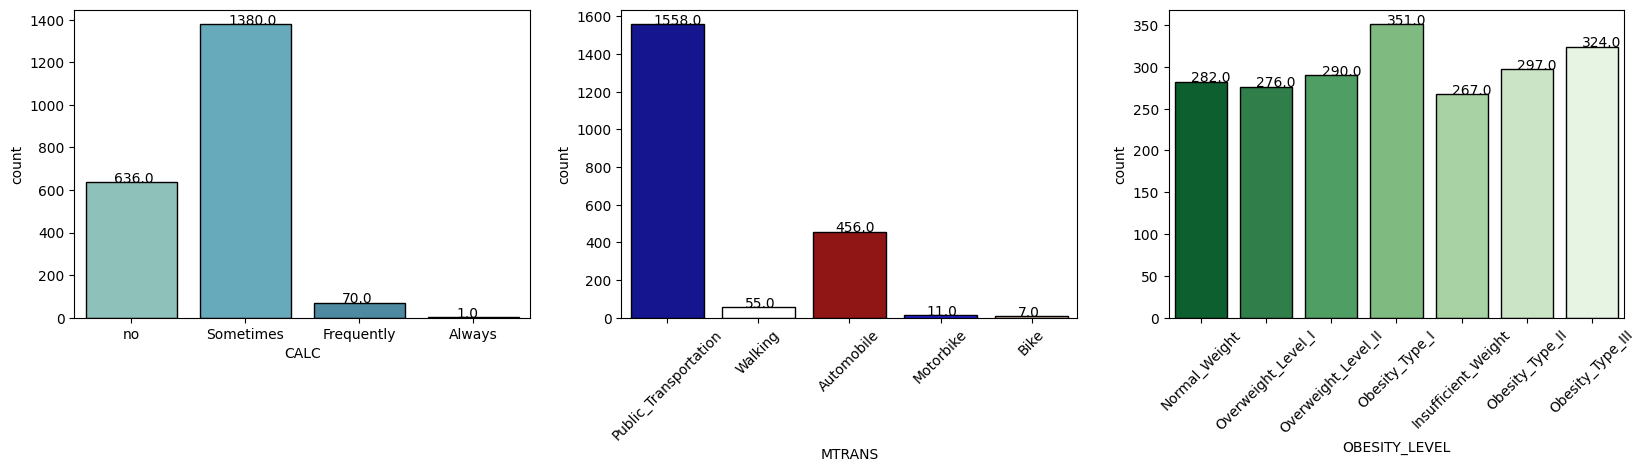

In [ ]:
plt.figure(figsize=(20,4))
plt.subplot(1,3,1)
ax=sns.countplot(x= 'CALC', data = df, palette="GnBu_d",edgecolor="black")
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.subplot(1,3,2)
ax=sns.countplot(x= 'MTRANS', data = df, palette="flag",edgecolor="black")
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.xticks(rotation=45)
plt.subplot(1,3,3)
ax=sns.countplot(x= 'OBESITY_LEVEL', data = df, palette="Greens_r",edgecolor="black")
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.xticks(rotation=45)
plt.show()

[Text(0.5, 1.0, 'Age distribution of the dataset')]

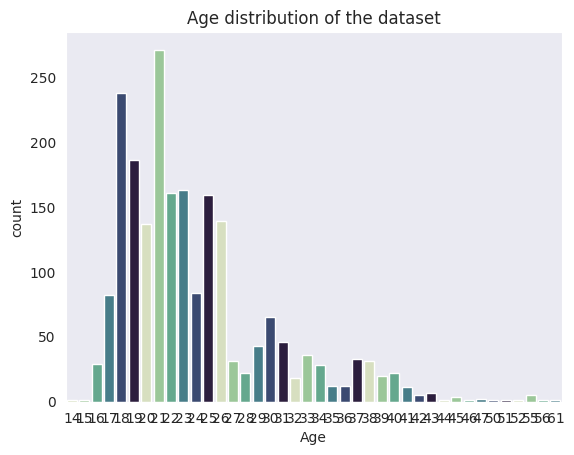

In [ ]:
data["Age"] = data["Age"].astype(int)
sns.set_style("dark")
sns.countplot(x="Age", data=data, 
              palette=sns.cubehelix_palette(start=.5, rot=-.75,), 
              saturation=1).set(title='Age distribution of the dataset')

We can see that mostly young people were joined the survey.

Top 3 ages: 21, 18, 19

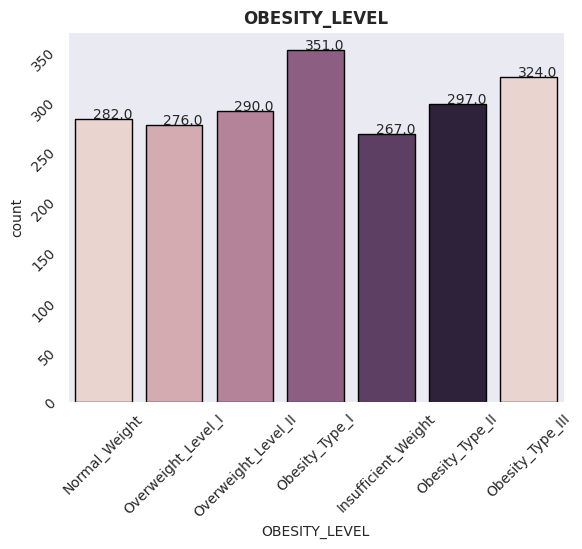

In [ ]:
ax=sns.countplot(x="OBESITY_LEVEL",data=df,palette=sns.cubehelix_palette(),edgecolor="black")
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.title('OBESITY_LEVEL', weight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
# changing the font size
sns.set(font_scale=1)

351 instances are belong to "obesity_type_1"; 267 instances are belong to "insufficient_weight" class.

Overall, we can say that the dataset is "balanced" which is really important in learning phase later :)

# Bi-variate analysis

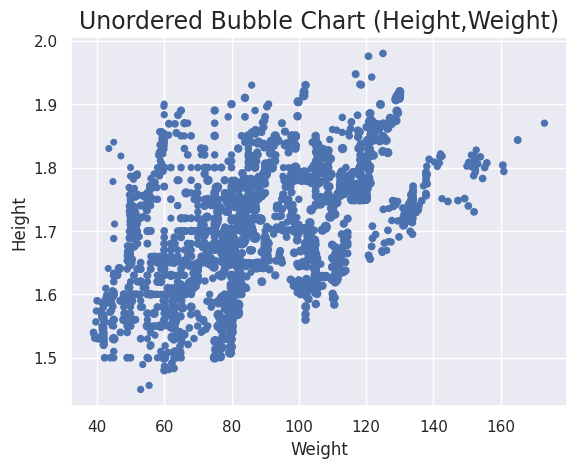

In [ ]:
x = df['Weight']
y = df['Height']
size = df['Age']
plt.scatter(x,y,s=size)
plt.title('Unordered Bubble Chart (Height,Weight)',size=17)
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

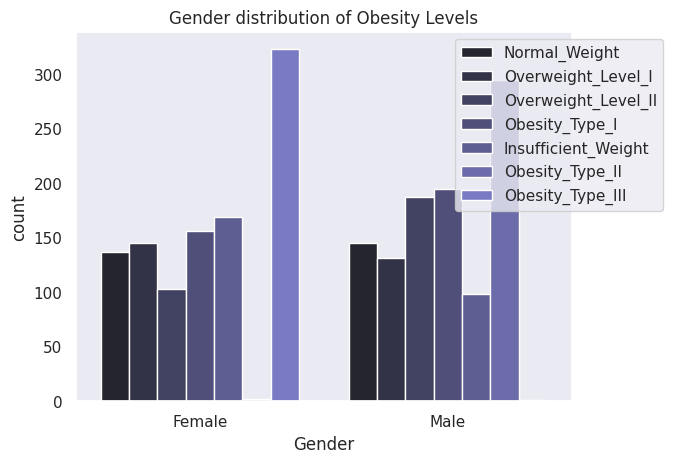

In [ ]:
#Obesity Distribution Between two Genders
sns.set_style("dark")
sns.countplot(x="Gender", data=df, palette=sns.dark_palette("#88d", 8), 
              saturation=10, hue="OBESITY_LEVEL").set(title='Gender distribution of Obesity Levels')

plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.))

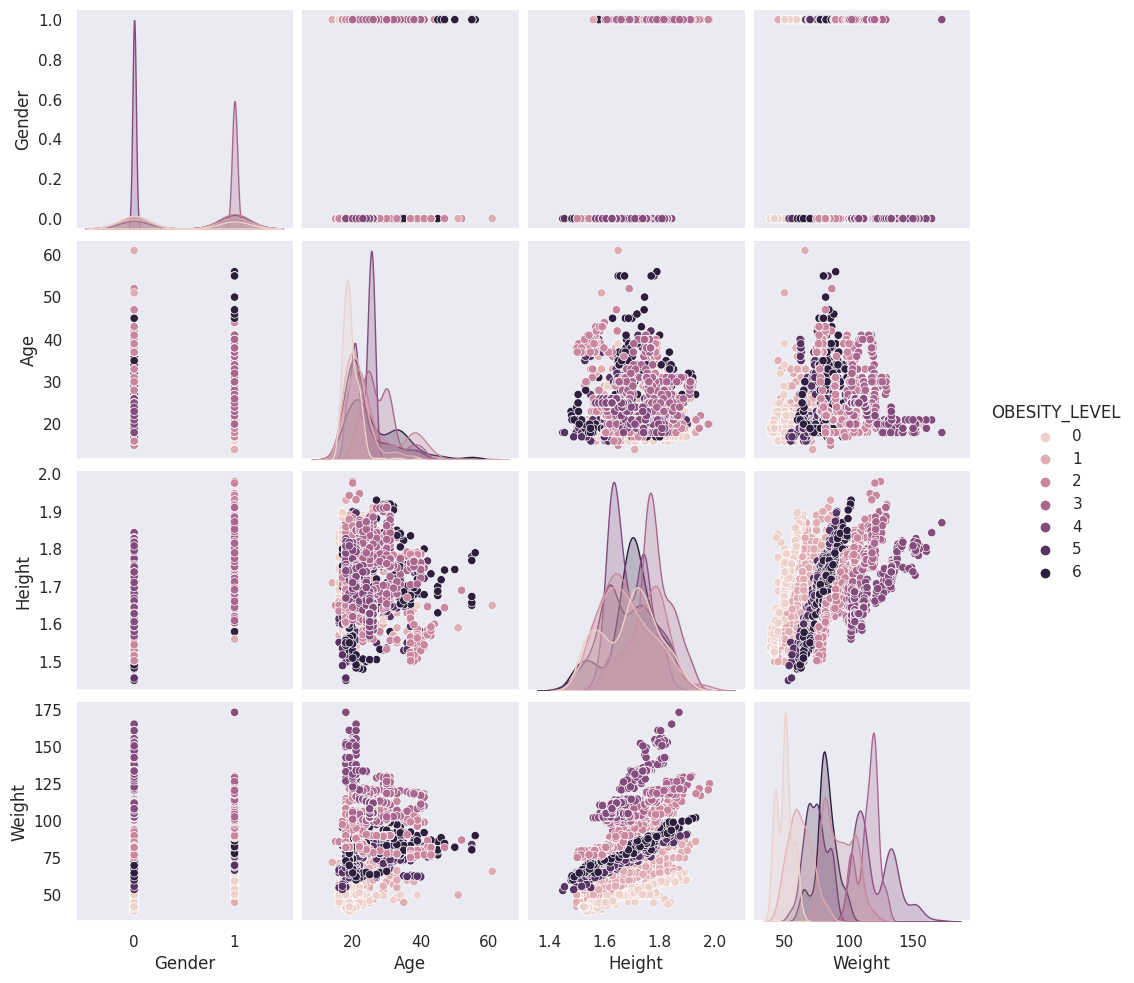

In [ ]:
object_cols = [col for col in data.columns if data[col].dtype == "object"]
good_label_cols = [col for col in object_cols if set(data[col]).issubset(set(data[col]))]
data_transform = data.copy()
ordinal_encoder = OrdinalEncoder()
data_transform[good_label_cols] = ordinal_encoder.fit_transform(data_transform[good_label_cols])
dic_to_replace = {"OBESITY_LEVEL": {"Insufficient_Weight": 0, 
                          "Normal_Weight": 1,
                         'Overweight_Level_I': 2,
                          'Overweight_Level_II': 3,
                          'Obesity_Type_I': 4,
                          'Obesity_Type_II': 5,
                          'Obesity_Type_III': 6}
                         }
data_transform.replace(dic_to_replace, inplace=True)

sns.pairplot(data_transform, 
             hue ='OBESITY_LEVEL', 
             vars = ['Gender','Age', 
                     'Height', 'Weight'])
plt.savefig('pairplot1.png')

In [ ]:
data = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
data.rename(columns = {'family_history_with_overweight':'HIST_OVERWEIGHT','NObeyesdad':"OBESITY_LEVEL"}, inplace = True)

In [ ]:
data['Gender'] = (data['Gender'] == 'Male').astype(int)
data

,Gender,Age,Height,Weight,HIST_OVERWEIGHT,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,OBESITY_LEVEL
0,0,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,0,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,1,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,1,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,1,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,0,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,0,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,0,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


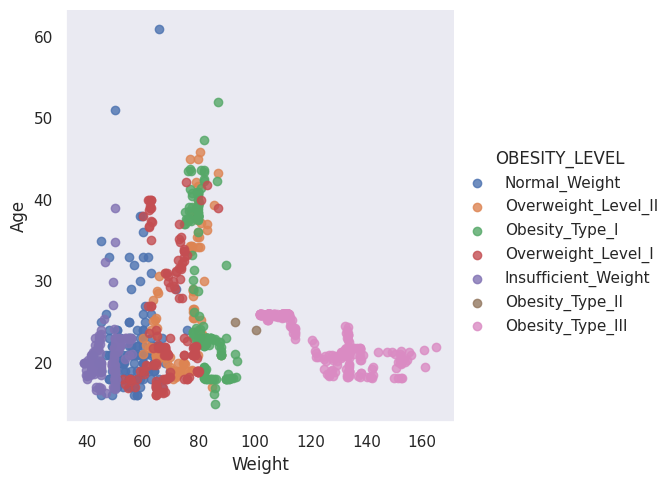

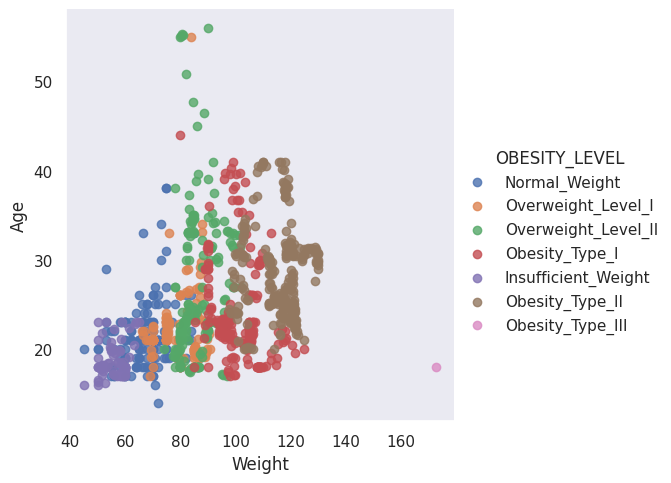

In [ ]:
import seaborn as sns
data_f=data[data["Gender"]==0]
sns.lmplot(x='Weight', y='Age', hue='OBESITY_LEVEL', 
           data=data_f.loc[data_f['OBESITY_LEVEL'].isin(["Insufficient_Weight","Normal_Weight",'Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])], 
           fit_reg=False)
data_m=data[data["Gender"]==1]
sns.lmplot(x='Weight', y='Age', hue='OBESITY_LEVEL', 
           data=data_m.loc[data_m['OBESITY_LEVEL'].isin(["Insufficient_Weight","Normal_Weight",'Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])], 
           fit_reg=False)


Finding Relation between Attributes

In [ ]:
# Correlation matrix
data['OBESITY_LEVEL'] = data['OBESITY_LEVEL'].map({'Normal_Weight' : 0, 'Overweight_Level_I': 1, 'Overweight_Level_II': 1, 'Insufficient_Weight': 0, \
 'Obesity_Type_I' : 2  , 'Obesity_Type_II' : 2, \
 'Obesity_Type_III' : 2 })
data['CAEC'] = data['CAEC'].apply(lambda x: ['no', 'Sometimes', 'Frequently', 'Always'].index(x))
data['SMOKE'] = data['SMOKE'].apply(lambda x: ['yes', 'no'].index(x))
data['SCC'] = data['SCC'].apply(lambda x: ['yes', 'no'].index(x))
data['CALC'] = data['CALC'].apply(lambda x:['no', 'Sometimes', 'Frequently', 'Always'].index(x))
#data['Gender'] = data['Gender'].map({'Male' : 0, 'Female': 1})
data['HIST_OVERWEIGHT'] = data['HIST_OVERWEIGHT'].map({'no' : 0, 'yes': 1})
data['FAVC'] = data['FAVC'].map({'no' : 0, 'yes': 1})
data['MTRANS'] = data['MTRANS'].map({'Public_Transportation': 1, 'Walking':2, 'Automobile':3, 'Motorbike':4, 'Bike':5})

data.corr()

,Gender,Age,Height,Weight,HIST_OVERWEIGHT,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,OBESITY_LEVEL
Gender,1.000000,0.048394,0.618466,0.161668,0.102512,0.064934,-0.274505,0.067600,-0.091543,-0.044698,0.107930,0.102633,0.189607,0.017269,-0.007616,0.164116,0.042359
Age,0.048394,1.000000,-0.025958,0.202560,0.205725,0.063902,0.016291,-0.043944,-0.083739,-0.091987,-0.045304,0.116283,-0.144938,-0.296931,0.044487,0.567983,0.308309
Height,0.618466,-0.025958,1.000000,0.463136,0.247684,0.178364,-0.038121,0.243672,-0.048818,-0.055499,0.213376,0.133753,0.294709,0.051912,0.129732,0.085768,0.144356
Weight,0.161668,0.202560,0.463136,1.000000,0.496820,0.272300,0.216125,0.107469,-0.287493,-0.025746,0.200575,0.201906,-0.051436,-0.071561,0.206677,-0.046615,0.848079
HIST_OVERWEIGHT,0.102512,0.205725,0.247684,0.496820,1.000000,0.208036,0.040372,0.071370,-0.169787,-0.017385,0.147437,0.185422,-0.056673,0.022943,-0.036676,0.065036,0.511098
FAVC,0.064934,0.063902,0.178364,0.272300,0.208036,1.000000,-0.027283,-0.007000,-0.150068,0.050660,0.009719,0.190658,-0.107995,0.068417,0.089520,-0.009102,0.283598
FCVC,-0.274505,0.016291,-0.038121,0.216125,0.040372,-0.027283,1.000000,0.042216,0.054670,-0.014320,0.068461,-0.071852,0.019939,-0.101135,0.060781,-0.065098,0.113146
NCP,0.067600,-0.043944,0.243672,0.107469,0.071370,-0.007000,0.042216,1.000000,0.097801,-0.007811,0.057088,0.015624,0.129504,0.036326,0.071747,0.059022,-0.034655
CAEC,-0.091543,-0.083739,-0.048818,-0.287493,-0.169787,-0.150068,0.054670,0.097801,1.000000,-0.055282,-0.144995,-0.109179,0.030110,0.048567,-0.047540,-0.003556,-0.367379
SMOKE,-0.044698,-0.091987,-0.055499,-0.025746,-0.017385,0.050660,-0.014320,-0.007811,-0.055282,1.000000,0.031995,0.047731,-0.011216,-0.017613,-0.082471,-0.021045,0.002433


<Axes: >

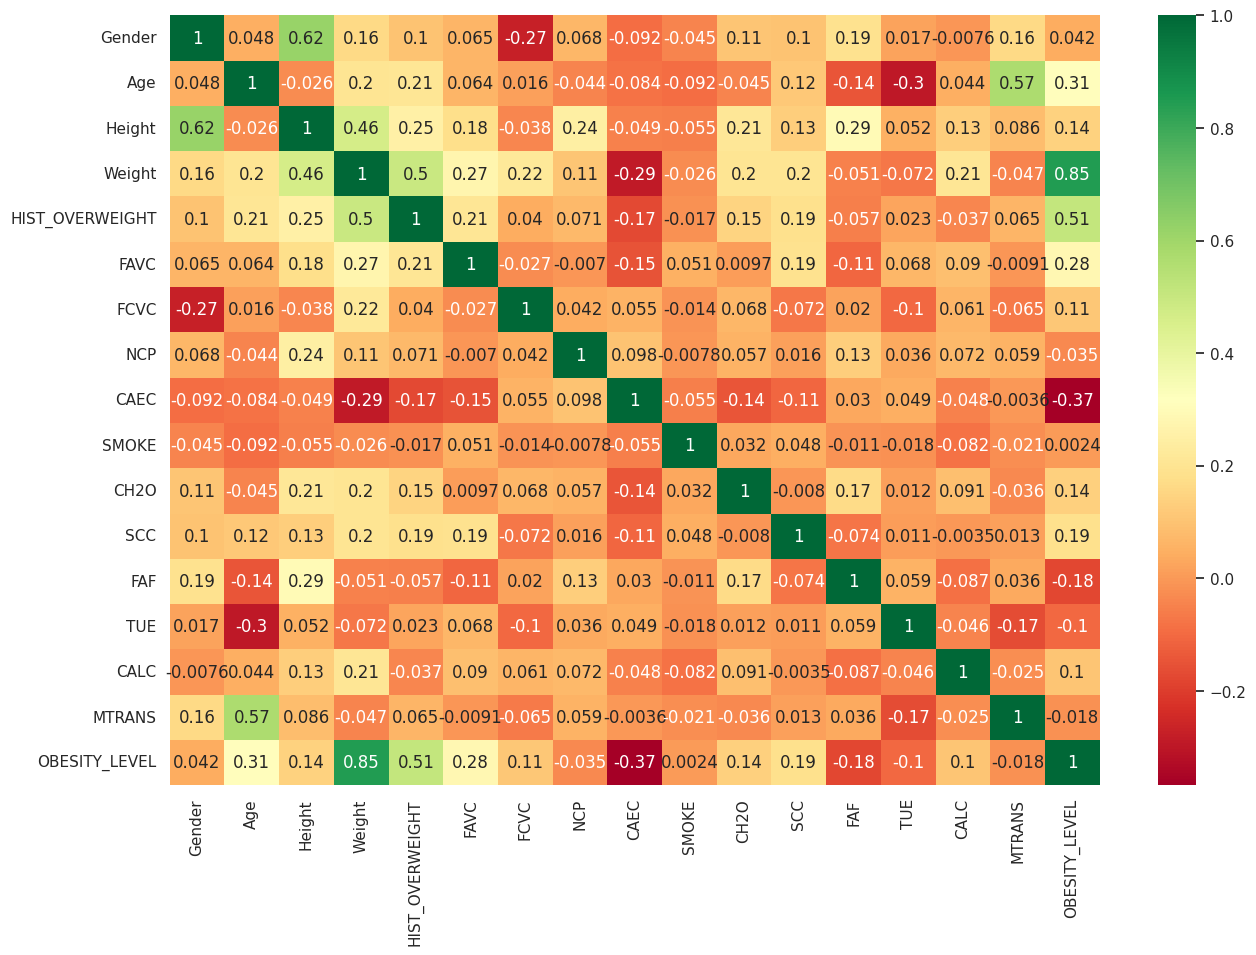

In [ ]:
#plotting the correlation Matrix
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot = True, cmap='RdYlGn') 

From the heat map we see that there seems to be a strong correlation between Weight and Obesity level which is to be expected. Moreover there is an inverse correlation between height and gender.



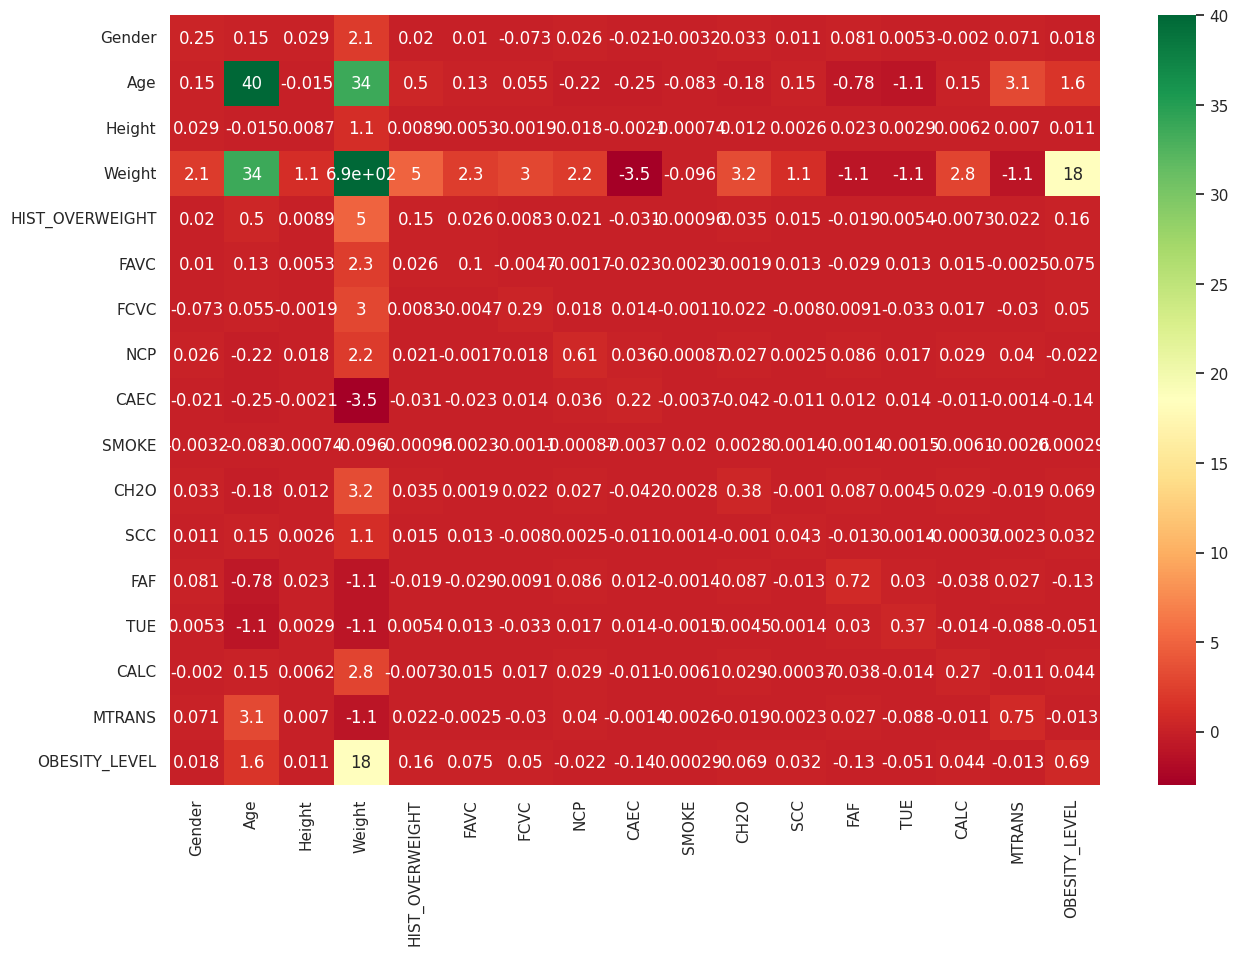

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(data.cov(), annot=True,vmin=-3, vmax=40,cmap='RdYlGn')
plt.show()

## ML

### Data PreProcessing

Removing Outliers in Numeric Features and filling them up with mean value of the feature

In [ ]:
data = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
data.rename(columns = {'family_history_with_overweight':'HIST_OVERWEIGHT','NObeyesdad':"OBESITY_LEVEL"}, inplace = True)
dup_data = data[data.duplicated()]
#Drop duplicates 
data = data.drop_duplicates(keep='last')

In [ ]:
#outlier detection & handling (filling with mean)
cont_feature_col=["FCVC", "NCP", "CH2O", "FAF", "TUE", "Height", "Weight", "Age"]
cont_df=data[cont_feature_col]

# find the IQR
q1 = data[cont_feature_col].quantile(.25)
q3 = data[cont_feature_col].quantile(.75)
IQR = q3-q1

outliers_data = np.logical_or((data[cont_feature_col] < (q1 - 1.5 * IQR)), (data[cont_feature_col] > (q3 + 1.5 * IQR))) 

outlier_list=[]
total_outlier=[]
for col in list(outliers_data.columns):
    try:
        total_outlier.append(outliers_data[col].value_counts()[True])
        outlier_list.append((outliers_data[col].value_counts()[True] / outliers_data[col].value_counts().sum()) * 100)
    except:
        outlier_list.append(0)
        total_outlier.append(0)
        
outlier_list

outlier_data=pd.DataFrame(zip(list(outliers_data.columns), total_outlier, outlier_list), columns=['name of the column', 'total', 'outlier(%)'])

#see totally how many outliers in cont features
outlier_data.set_index('name of the column', inplace=True)
#del outlier_df.index.name
outlier_data

,total,outlier(%)
name of the column,,
FCVC,0,0.000000
NCP,577,27.647341
CH2O,0,0.000000
FAF,0,0.000000
TUE,0,0.000000
Height,1,0.047916
Weight,1,0.047916
Age,167,8.001917


In [ ]:
data_cont=data[cont_feature_col]
out_nan_data=data_cont[~outliers_data]
out_nan_data

,FCVC,NCP,CH2O,FAF,TUE,Height,Weight,Age
0,2.0,3.0,2.000000,0.000000,1.000000,1.620000,64.000000,21.000000
1,3.0,3.0,3.000000,3.000000,0.000000,1.520000,56.000000,21.000000
2,2.0,3.0,2.000000,2.000000,1.000000,1.800000,77.000000,23.000000
3,3.0,3.0,2.000000,2.000000,0.000000,1.800000,87.000000,27.000000
4,2.0,NaN,2.000000,0.000000,0.000000,1.780000,89.800000,22.000000
...,...,...,...,...,...,...,...,...
2106,3.0,3.0,1.728139,1.676269,0.906247,1.710730,131.408528,20.976842
2107,3.0,3.0,2.005130,1.341390,0.599270,1.748584,133.742943,21.982942
2108,3.0,3.0,2.054193,1.414209,0.646288,1.752206,133.689352,22.524036
2109,3.0,3.0,2.852339,1.139107,0.586035,1.739450,133.346641,24.361936


In [ ]:
for col in cont_feature_col:
    col_mean=data[col].mean() #calculate mean for each col
    out_nan_data[col]=out_nan_data[col].fillna(col_mean) #first convert outliers to Nan values then fill Nan's with col mean
    #df[cont_feature_col]=df_cont

In [ ]:
data_only_cat=data.drop(columns=cont_feature_col)
#concat df_only_cat and clear cont_df of outliers
data_final=pd.concat([out_nan_data, data_only_cat], axis=1)
data_final

,FCVC,NCP,CH2O,FAF,TUE,Height,Weight,Age,Gender,HIST_OVERWEIGHT,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,OBESITY_LEVEL
0,2.0,3.000000,2.000000,0.000000,1.000000,1.620000,64.000000,21.000000,Female,yes,no,Sometimes,no,no,no,Public_Transportation,Normal_Weight
1,3.0,3.000000,3.000000,3.000000,0.000000,1.520000,56.000000,21.000000,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation,Normal_Weight
2,2.0,3.000000,2.000000,2.000000,1.000000,1.800000,77.000000,23.000000,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation,Normal_Weight
3,3.0,3.000000,2.000000,2.000000,0.000000,1.800000,87.000000,27.000000,Male,no,no,Sometimes,no,no,Frequently,Walking,Overweight_Level_I
4,2.0,2.701179,2.000000,0.000000,0.000000,1.780000,89.800000,22.000000,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,3.0,3.000000,1.728139,1.676269,0.906247,1.710730,131.408528,20.976842,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2107,3.0,3.000000,2.005130,1.341390,0.599270,1.748584,133.742943,21.982942,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2108,3.0,3.000000,2.054193,1.414209,0.646288,1.752206,133.689352,22.524036,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2109,3.0,3.000000,2.852339,1.139107,0.586035,1.739450,133.346641,24.361936,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
data_final.describe()

,FCVC,NCP,CH2O,FAF,TUE,Height,Weight,Age
count,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000
mean,2.421466,2.894178,2.004749,1.012812,0.663035,1.702541,86.817454,23.087867
std,0.534737,0.173105,0.608284,0.853475,0.608153,0.092988,26.122817,4.169392
min,1.000000,2.256119,1.000000,0.000000,0.000000,1.450000,39.000000,14.000000
25%,2.000000,2.701179,1.590922,0.124505,0.000000,1.630178,66.000000,19.915937
50%,2.396265,3.000000,2.000000,1.000000,0.630866,1.701584,83.101100,22.847618
75%,3.000000,3.000000,2.466193,1.678102,1.000000,1.769406,108.006302,25.540138
max,3.000000,3.452590,3.000000,3.000000,2.000000,1.975663,165.057269,35.125401


Encoding Ordinal Features

In [ ]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
df=pd.DataFrame(data_final)
cols_to_encode = ["Gender", "HIST_OVERWEIGHT", "SMOKE", "MTRANS", "SCC", "CALC", "CAEC", "FAVC", "OBESITY_LEVEL"]
oe = OrdinalEncoder(categories='auto')
df[cols_to_encode] = oe.fit_transform(df[cols_to_encode])
df

,FCVC,NCP,CH2O,FAF,TUE,Height,Weight,Age,Gender,HIST_OVERWEIGHT,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,OBESITY_LEVEL
0,2.0,3.000000,2.000000,0.000000,1.000000,1.620000,64.000000,21.000000,0.0,1.0,0.0,2.0,0.0,0.0,3.0,3.0,1.0
1,3.0,3.000000,3.000000,3.000000,0.000000,1.520000,56.000000,21.000000,0.0,1.0,0.0,2.0,1.0,1.0,2.0,3.0,1.0
2,2.0,3.000000,2.000000,2.000000,1.000000,1.800000,77.000000,23.000000,1.0,1.0,0.0,2.0,0.0,0.0,1.0,3.0,1.0
3,3.0,3.000000,2.000000,2.000000,0.000000,1.800000,87.000000,27.000000,1.0,0.0,0.0,2.0,0.0,0.0,1.0,4.0,5.0
4,2.0,2.701179,2.000000,0.000000,0.000000,1.780000,89.800000,22.000000,1.0,0.0,0.0,2.0,0.0,0.0,2.0,3.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,3.0,3.000000,1.728139,1.676269,0.906247,1.710730,131.408528,20.976842,0.0,1.0,1.0,2.0,0.0,0.0,2.0,3.0,4.0
2107,3.0,3.000000,2.005130,1.341390,0.599270,1.748584,133.742943,21.982942,0.0,1.0,1.0,2.0,0.0,0.0,2.0,3.0,4.0
2108,3.0,3.000000,2.054193,1.414209,0.646288,1.752206,133.689352,22.524036,0.0,1.0,1.0,2.0,0.0,0.0,2.0,3.0,4.0
2109,3.0,3.000000,2.852339,1.139107,0.586035,1.739450,133.346641,24.361936,0.0,1.0,1.0,2.0,0.0,0.0,2.0,3.0,4.0


In [ ]:
cols_to_encode = ["Gender", "HIST_OVERWEIGHT", "SMOKE", "MTRANS", "SCC", "CALC", "CAEC", "FAVC", "OBESITY_LEVEL"]
for i in cols_to_encode:
    print("Values Before enocding of columns",i,":",data_final[i].unique())
    print("Values After enocding of columns",i,":",df[i].unique())
    

Values Before enocding of columns Gender : ['Female' 'Male']
Values After enocding of columns Gender : [0. 1.]
Values Before enocding of columns HIST_OVERWEIGHT : ['yes' 'no']
Values After enocding of columns HIST_OVERWEIGHT : [1. 0.]
Values Before enocding of columns SMOKE : ['no' 'yes']
Values After enocding of columns SMOKE : [0. 1.]
Values Before enocding of columns MTRANS : ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
Values After enocding of columns MTRANS : [3. 4. 0. 2. 1.]
Values Before enocding of columns SCC : ['no' 'yes']
Values After enocding of columns SCC : [0. 1.]
Values Before enocding of columns CALC : ['no' 'Sometimes' 'Frequently' 'Always']
Values After enocding of columns CALC : [3. 2. 1. 0.]
Values Before enocding of columns CAEC : ['Sometimes' 'Frequently' 'Always' 'no']
Values After enocding of columns CAEC : [2. 1. 0. 3.]
Values Before enocding of columns FAVC : ['no' 'yes']
Values After enocding of columns FAVC : [0. 1.]
Values Before eno

## Feature Importance Using Different Methods

- Using Random forest classifiers

In [ ]:
#Store the feature and target variable 
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

print(df.shape)
print(X.shape)
print(y.shape)

#Partition the data into training and test sets (70/30)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2087, 17)
(2087, 16)
(2087,)
(1460, 16)
(627, 16)
(1460,)
(627,)


In [ ]:
#normalization(make all values bet. 0-1)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_normalized_arr=scaler.transform(X_train)
X_train_normalized_df=pd.DataFrame(X_train_normalized_arr, columns=X_train.columns.to_list())

X_test_normalized_arr=scaler.transform(X_test)
X_test_normalized_df=pd.DataFrame(X_test_normalized_arr, columns=X_test.columns.to_list())

In [ ]:
X_test

,FCVC,NCP,CH2O,FAF,TUE,Height,Weight,Age,Gender,HIST_OVERWEIGHT,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS
1337,1.524428,3.000000,1.383831,0.130417,1.000000,1.681719,90.671871,18.603496,0.0,1.0,1.0,2.0,0.0,0.0,2.0,3.0
1763,2.496190,3.000000,1.662117,0.992371,0.217632,1.848845,125.077863,31.199261,1.0,1.0,1.0,2.0,1.0,0.0,2.0,3.0
391,2.000000,3.000000,2.000000,0.000000,1.000000,1.700000,50.000000,18.000000,0.0,0.0,0.0,2.0,0.0,0.0,2.0,4.0
597,2.000000,3.000000,2.000000,0.000000,1.593704,1.710800,50.925380,18.000000,1.0,1.0,1.0,2.0,0.0,0.0,2.0,3.0
1735,2.247037,3.000000,2.718408,0.763595,0.000000,1.816197,119.622764,26.734476,1.0,1.0,1.0,2.0,0.0,0.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,2.121909,3.000000,2.500556,1.207580,0.000000,1.775584,103.605896,21.797388,1.0,1.0,1.0,2.0,0.0,0.0,3.0,3.0
1247,2.000000,2.701179,2.000000,0.026142,0.000000,1.615854,80.615325,23.000000,0.0,1.0,1.0,2.0,0.0,0.0,3.0,3.0
1199,2.000000,2.701179,1.855054,1.083572,0.218574,1.757961,87.906019,32.241587,1.0,1.0,1.0,2.0,0.0,0.0,2.0,3.0
43,2.000000,3.000000,2.000000,1.000000,1.000000,1.660000,62.000000,21.000000,1.0,1.0,1.0,2.0,1.0,0.0,1.0,3.0


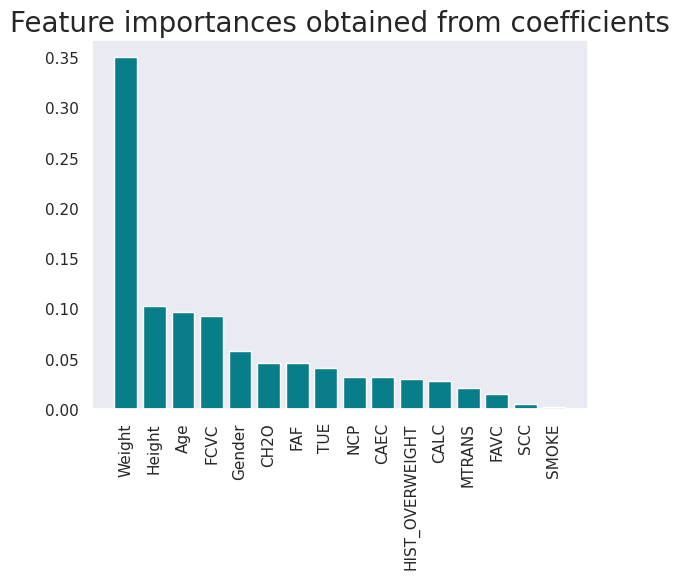

In [ ]:
# Source - [6]
model = RandomForestClassifier()
model.fit(X_train_normalized_df, y_train)

# Importance rankings
importances = pd.DataFrame(data={
    'Attribute': X_train_normalized_df.columns,
    'Importance': model.feature_importances_
})

importances = importances.sort_values(by='Importance', ascending=False)

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

- Using XGBoost

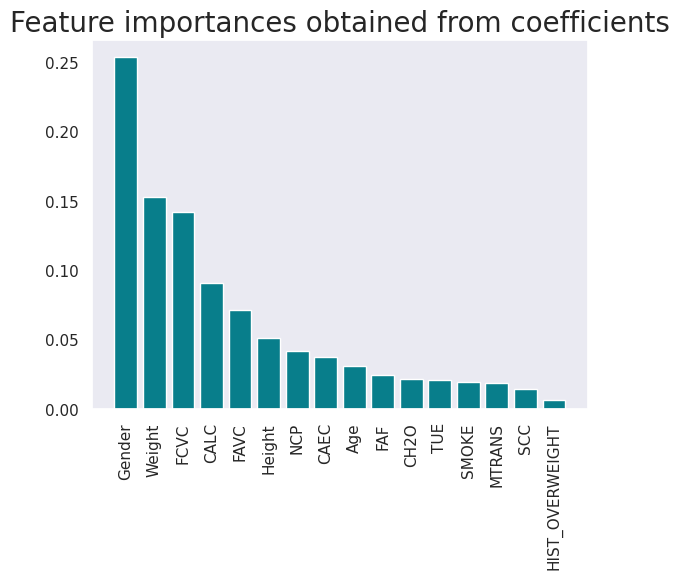

In [ ]:
# Source - [6]
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train_normalized_df, y_train)


importances = pd.DataFrame(data={
    'Attribute': X_train_normalized_df.columns,
    'Importance': model.feature_importances_
})


importances = importances.sort_values(by='Importance', ascending=False)
#Source - [6]
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

As we can see the columns smoke,mtrans and scc seem to have very less improtance in predicting the obesity level.
Hence we shall remove then from the data frame

In [ ]:
X_train_normalized_df.drop(['SCC', 'MTRANS','SMOKE'], axis=1)
X_test_normalized_df.drop(['SCC', 'MTRANS','SMOKE'], axis=1)

,FCVC,NCP,CH2O,FAF,TUE,Height,Weight,Age,Gender,HIST_OVERWEIGHT,FAVC,CAEC,CALC
0,0.262214,0.626512,0.191916,0.043472,0.500000,0.440813,0.409908,0.217913,0.0,1.0,1.0,0.666667,0.666667
1,0.748095,0.626512,0.331059,0.330790,0.108816,0.758747,0.682847,0.814151,1.0,1.0,1.0,0.666667,0.666667
2,0.500000,0.626512,0.500000,0.000000,0.500000,0.475590,0.087262,0.189346,0.0,0.0,0.0,0.666667,0.666667
3,0.500000,0.626512,0.500000,0.000000,0.796852,0.496135,0.094603,0.189346,1.0,1.0,1.0,0.666667,0.666667
4,0.623519,0.626512,0.859204,0.254532,0.000000,0.696638,0.639573,0.602804,1.0,1.0,1.0,0.666667,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,0.560955,0.626512,0.750278,0.402527,0.000000,0.619378,0.512512,0.369100,1.0,1.0,1.0,0.666667,1.000000
623,0.500000,0.374839,0.500000,0.008714,0.000000,0.315514,0.330130,0.426027,0.0,1.0,1.0,0.666667,1.000000
624,0.500000,0.374839,0.427527,0.361191,0.109287,0.585853,0.387967,0.863491,1.0,1.0,1.0,0.666667,0.666667
625,0.500000,0.626512,0.500000,0.333333,0.500000,0.399495,0.182457,0.331355,1.0,1.0,1.0,0.666667,0.333333


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
# cross-validation with 10 splits
cv = StratifiedShuffleSplit(n_splits=10, random_state = 42, test_size=0.2)

In [ ]:
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, classification_report, roc_auc_score

# display test scores and return result string and indexes of false samples
def display_test_scores(test, pred):
    str_out = ""
    str_out += ("\n\n   TEST SCORES\n")
    str_out += ("===================================================================\n")
    
    #print accuracy
    accuracy = accuracy_score(test, pred)
    str_out += ("ACCURACY: {:.4f}\n".format(accuracy))
    str_out += ("\n")
    str_out += ("---------------------------------------------------\n")
    

    #print confusion matrix
    mapping = {'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Obesity_Type_I': 2, 'Obesity_Type_II': 3, 'Obesity_Type_III': 4, 'Overweight_Level_I': 5, 'Overweight_Level_II': 6}
    #str_out += ("CONFUSION MATRIX:\n")
    conf_mat = confusion_matrix(test, pred)
    conf_mat_df = pd.DataFrame(conf_mat,index=mapping)
    plt.figure(figsize=(8,6))                  
    sns.heatmap(conf_mat_df, annot=True)
    #plt.title('The accuracy Decision Tree (Best param): {0:.3f}'.format(accuracy_score(test,pred)),fontsize=13)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label',)
    plt.show()

    
    #print FP, FN
    str_out += ("FALSE POSITIVES:\n")
    fp = conf_mat[1][0]
    pos_labels = conf_mat[1][0]+conf_mat[1][1]
    str_out += ("{} out of {} positive labels ({:.4f}%)\n".format(fp, pos_labels,fp/pos_labels))
    str_out += ("\n")
    str_out += ("---------------------------------------------------\n")

    str_out += ("FALSE NEGATIVES:\n")
    fn = conf_mat[0][1]
    neg_labels = conf_mat[0][1]+conf_mat[0][0]
    str_out += ("{} out of {} negative labels ({:.4f}%)\n".format(fn, neg_labels, fn/neg_labels))
    str_out += ("\n")
    str_out += ("--------------------------------------------------\n")

    #print classification report
    str_out += ("PRECISION, RECALL, F1 scores:\n\n")
    str_out += ("{}".format(classification_report(test, pred)))
    
    false_indexes = np.where(test != pred)
    return str_out, false_indexes

# Classifier-1: Decision Tree CART

The best parameters are {'class_weight': None, 'criterion': 'entropy', 'splitter': 'best'} with a score of 0.9363
CONFUSION MATRIX:



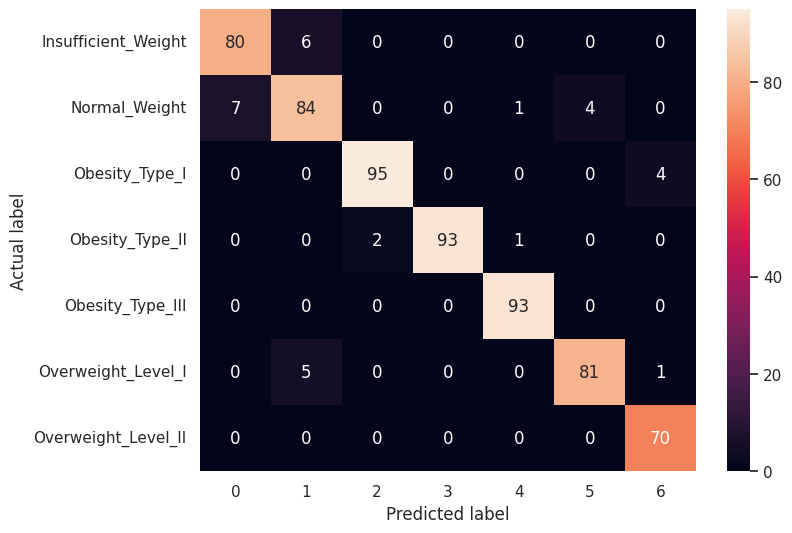



   TEST SCORES
ACCURACY: 0.9506

---------------------------------------------------
FALSE POSITIVES:
7 out of 91 positive labels (0.0769%)

---------------------------------------------------
FALSE NEGATIVES:
6 out of 86 negative labels (0.0698%)

--------------------------------------------------
PRECISION, RECALL, F1 scores:

              precision    recall  f1-score   support

         0.0       0.92      0.93      0.92        86
         1.0       0.88      0.88      0.88        96
         2.0       0.98      0.96      0.97        99
         3.0       1.00      0.97      0.98        96
         4.0       0.98      1.00      0.99        93
         5.0       0.95      0.93      0.94        87
         6.0       0.93      1.00      0.97        70

    accuracy                           0.95       627
   macro avg       0.95      0.95      0.95       627
weighted avg       0.95      0.95      0.95       627



In [ ]:
# CART decision tree
cart = DecisionTreeClassifier(random_state = 0)

# parameters 
parameters = {
                "criterion": ["gini","entropy"],
                "splitter": ["best","random"],
                "class_weight": [None, "balanced"],
                }

# grid search for parameters
grid_1 = GridSearchCV(estimator=cart, param_grid=parameters,cv=cv, n_jobs=-1)
grid_1.fit(X_train_normalized_df, y_train)

# print best scores
print("The best parameters are %s with a score of %0.4f"
      % (grid_1.best_params_, grid_1.best_score_))
# prediction results
y_pred = grid_1.predict(X_test_normalized_df)

# print accuracy metrics
print("CONFUSION MATRIX:\n")
results, false = display_test_scores(y_test, y_pred)
print(results)

# Classifier-2: SVM

The best parameters are {'C': 100, 'kernel': 'linear', 'max_iter': 5000} with a score of 0.9493

CONFUSION MATRIX:



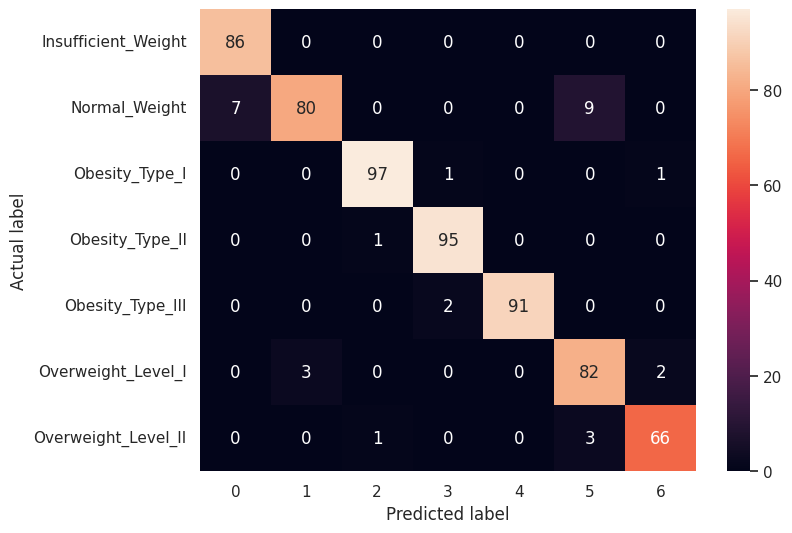



   TEST SCORES
ACCURACY: 0.9522

---------------------------------------------------
FALSE POSITIVES:
7 out of 87 positive labels (0.0805%)

---------------------------------------------------
FALSE NEGATIVES:
0 out of 86 negative labels (0.0000%)

--------------------------------------------------
PRECISION, RECALL, F1 scores:

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        86
         1.0       0.96      0.83      0.89        96
         2.0       0.98      0.98      0.98        99
         3.0       0.97      0.99      0.98        96
         4.0       1.00      0.98      0.99        93
         5.0       0.87      0.94      0.91        87
         6.0       0.96      0.94      0.95        70

    accuracy                           0.95       627
   macro avg       0.95      0.95      0.95       627
weighted avg       0.95      0.95      0.95       627



In [ ]:
# SVM classifier
from sklearn.svm import LinearSVC,SVC

svm = SVC(tol=1e-5, random_state=0)

# parameters 
parameters = {
                'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                'C': [0.01, 0.1, 1, 10, 100],
                'max_iter': [100, 1000, 5000]
            }

# grid search for parameters
grid_3 = GridSearchCV(estimator=svm,cv=cv, param_grid=parameters, n_jobs=-1)
grid_3.fit(X_train_normalized_df, y_train)

# print best scores
print("The best parameters are %s with a score of %0.4f\n"
      % (grid_3.best_params_, grid_3.best_score_))

# prediction results
y_pred = grid_3.predict(X_test_normalized_df)

# print accuracy metrics
print("CONFUSION MATRIX:\n")
results, false = display_test_scores(y_test, y_pred)
print(results)

# Classifier-3:Random Forest

The best parameters are {'class_weight': None, 'max_features': 'sqrt', 'max_samples': 0.9, 'n_estimators': 200} with a score of 0.9497
CONFUSION MATRIX:



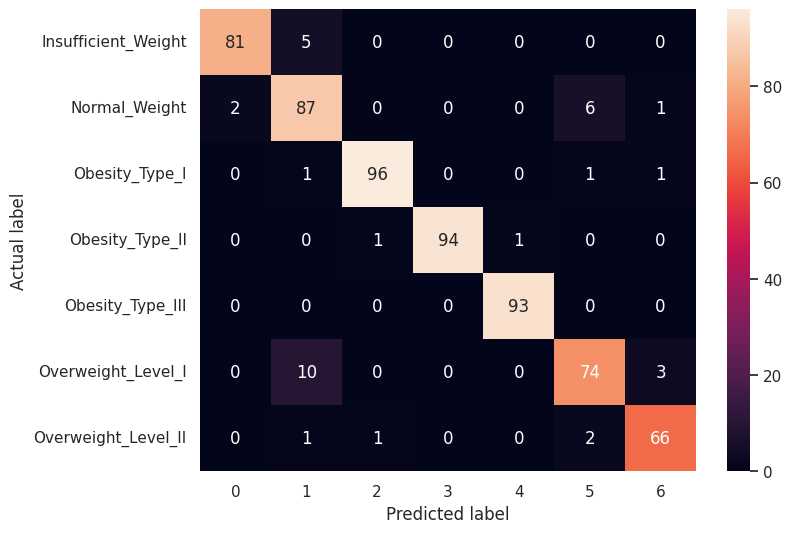



   TEST SCORES
ACCURACY: 0.9426

---------------------------------------------------
FALSE POSITIVES:
2 out of 89 positive labels (0.0225%)

---------------------------------------------------
FALSE NEGATIVES:
5 out of 86 negative labels (0.0581%)

--------------------------------------------------
PRECISION, RECALL, F1 scores:

              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96        86
         1.0       0.84      0.91      0.87        96
         2.0       0.98      0.97      0.97        99
         3.0       1.00      0.98      0.99        96
         4.0       0.99      1.00      0.99        93
         5.0       0.89      0.85      0.87        87
         6.0       0.93      0.94      0.94        70

    accuracy                           0.94       627
   macro avg       0.94      0.94      0.94       627
weighted avg       0.94      0.94      0.94       627



In [ ]:
rf = RandomForestClassifier(random_state=0)

# parameters 
parameters = {
                
                "max_features": [None, "sqrt", "log2"],
                "class_weight": [None, "balanced", "balanced_subsample"],
                "max_samples": [None, 0.3, 0.5, 0.7, 0.9],
                "n_estimators": [10, 100, 200]
                
}

# grid search for parameters
grid_6 = GridSearchCV(estimator=rf, cv=cv,param_grid=parameters, n_jobs=-1)
grid_6.fit(X_train_normalized_df, y_train)

# print best scores
print("The best parameters are %s with a score of %0.4f"
      % (grid_6.best_params_, grid_6.best_score_))

# prediction results
y_pred = grid_6.predict(X_test_normalized_df)

# print accuracy metrics
print("CONFUSION MATRIX:\n")
results, false = display_test_scores(y_test, y_pred)
print(results)

# Classifier-4: KNN


The best parameters are {'algorithm': 'auto', 'n_neighbors': 5} with a score of 0.7586

CONFUSION MATRIX:



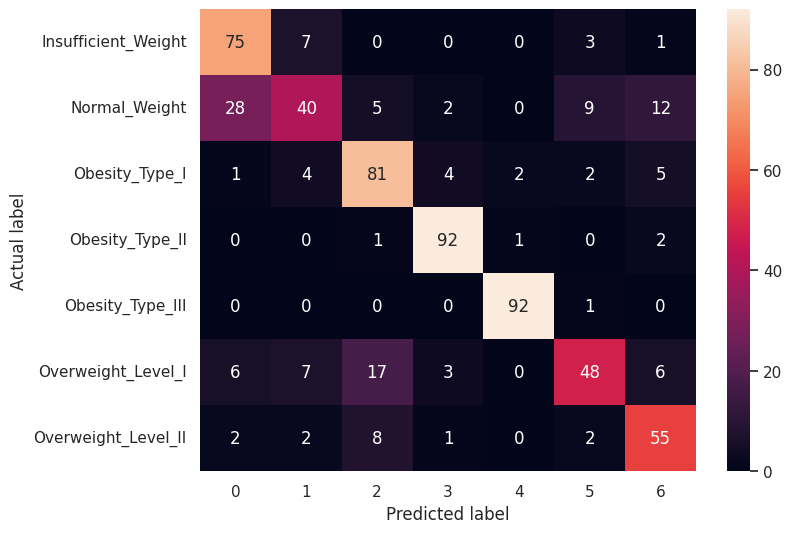



   TEST SCORES
ACCURACY: 0.7703

---------------------------------------------------
FALSE POSITIVES:
28 out of 68 positive labels (0.4118%)

---------------------------------------------------
FALSE NEGATIVES:
7 out of 82 negative labels (0.0854%)

--------------------------------------------------
PRECISION, RECALL, F1 scores:

              precision    recall  f1-score   support

         0.0       0.67      0.87      0.76        86
         1.0       0.67      0.42      0.51        96
         2.0       0.72      0.82      0.77        99
         3.0       0.90      0.96      0.93        96
         4.0       0.97      0.99      0.98        93
         5.0       0.74      0.55      0.63        87
         6.0       0.68      0.79      0.73        70

    accuracy                           0.77       627
   macro avg       0.76      0.77      0.76       627
weighted avg       0.77      0.77      0.76       627



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
# parameters 
parameters = {
                "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
                "n_neighbors": [5,15,25]
    }

# grid search for parameters
grid_4 = GridSearchCV(estimator=knn, param_grid=parameters, cv=cv, n_jobs=-1)
grid_4.fit(X_train_normalized_df, y_train)

# print best scores
print("The best parameters are %s with a score of %0.4f\n"
      % (grid_4.best_params_, grid_4.best_score_))

# prediction results
y_pred = grid_4.predict(X_test_normalized_df)

# print accuracy metrics
print("CONFUSION MATRIX:\n")
results, false = display_test_scores(y_test, y_pred)
print(results)

# Classifier 5 Extra Trees Classifier

The best parameters are {'class_weight': None, 'max_features': None, 'max_samples': None, 'n_estimators': 200} with a score of 0.9589
CONFUSION MATRIX:



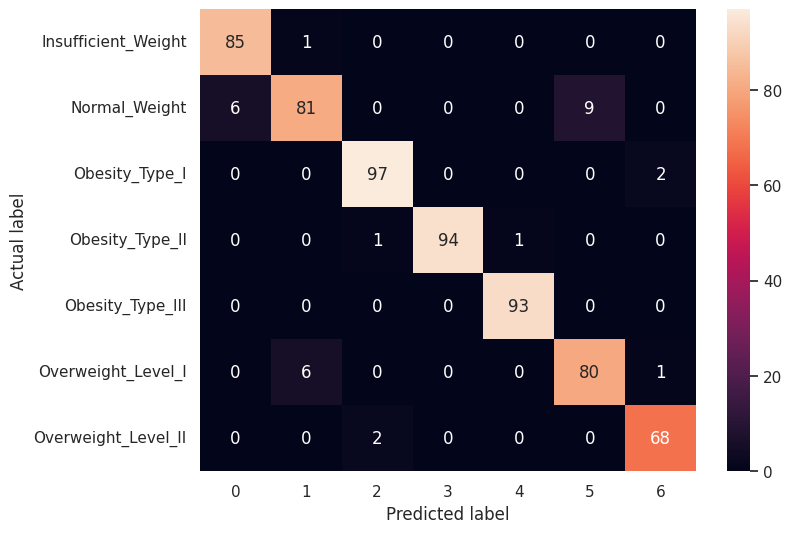



   TEST SCORES
ACCURACY: 0.9537

---------------------------------------------------
FALSE POSITIVES:
6 out of 87 positive labels (0.0690%)

---------------------------------------------------
FALSE NEGATIVES:
1 out of 86 negative labels (0.0116%)

--------------------------------------------------
PRECISION, RECALL, F1 scores:

              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96        86
         1.0       0.92      0.84      0.88        96
         2.0       0.97      0.98      0.97        99
         3.0       1.00      0.98      0.99        96
         4.0       0.99      1.00      0.99        93
         5.0       0.90      0.92      0.91        87
         6.0       0.96      0.97      0.96        70

    accuracy                           0.95       627
   macro avg       0.95      0.95      0.95       627
weighted avg       0.95      0.95      0.95       627



In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

extra = ExtraTreesClassifier(random_state=0)

# parameters 
parameters = {
               
                "max_features": [None, "sqrt", "log2"],
                "class_weight": [None, "balanced", "balanced_subsample"],
                "max_samples": [None, 0.3, 0.5, 0.7, 0.9],
                "n_estimators": [10, 100, 200]
                
}

# grid search for parameters
grid_8 = GridSearchCV(estimator=extra, param_grid=parameters, cv=cv, n_jobs=-1)
grid_8.fit(X_train_normalized_df, y_train)

# print best scores
print("The best parameters are %s with a score of %0.4f"
      % (grid_8.best_params_, grid_8.best_score_))

# prediction results
y_pred = grid_8.predict(X_test_normalized_df)

# print accuracy metrics
print("CONFUSION MATRIX:\n")
results, false = display_test_scores(y_test, y_pred)
print(results)

# Classifier 6 Gradient Boost

The best parameters are {'criterion': 'friedman_mse', 'max_features': None, 'n_estimators': 200} with a score of 0.9558
CONFUSION MATRIX:



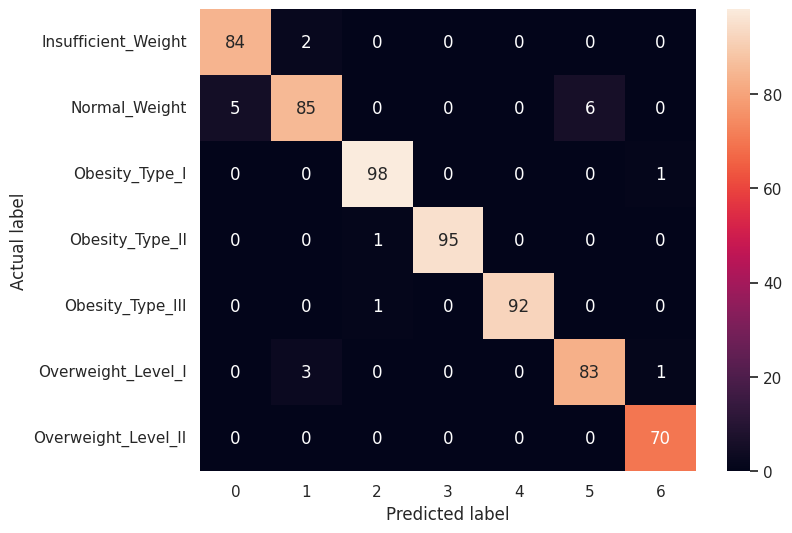



   TEST SCORES
ACCURACY: 0.9681

---------------------------------------------------
FALSE POSITIVES:
5 out of 90 positive labels (0.0556%)

---------------------------------------------------
FALSE NEGATIVES:
2 out of 86 negative labels (0.0233%)

--------------------------------------------------
PRECISION, RECALL, F1 scores:

              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96        86
         1.0       0.94      0.89      0.91        96
         2.0       0.98      0.99      0.98        99
         3.0       1.00      0.99      0.99        96
         4.0       1.00      0.99      0.99        93
         5.0       0.93      0.95      0.94        87
         6.0       0.97      1.00      0.99        70

    accuracy                           0.97       627
   macro avg       0.97      0.97      0.97       627
weighted avg       0.97      0.97      0.97       627



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
grb = GradientBoostingClassifier()

# parameters 
parameters = {
                "criterion": ['friedman_mse', 'squared_error'],
                "max_features": [None, "sqrt", "log2"],
                
                
                "n_estimators": [10, 100, 200]
}

# grid search for parameters
grid_6 = GridSearchCV(estimator=grb, cv=cv,param_grid=parameters, n_jobs=-1)
grid_6.fit(X_train_normalized_df, y_train)

# print best scores
print("The best parameters are %s with a score of %0.4f"
      % (grid_6.best_params_, grid_6.best_score_))

# prediction results
y_pred = grid_6.predict(X_test_normalized_df)

# print accuracy metrics
print("CONFUSION MATRIX:\n")
results, false = display_test_scores(y_test, y_pred)
print(results)

# Classifier 7 Bagging Meta

The best parameters are {'bootstrap': False, 'max_features': 0.5, 'max_samples': 0.7, 'n_estimators': 200} with a score of 0.9620
CONFUSION MATRIX:



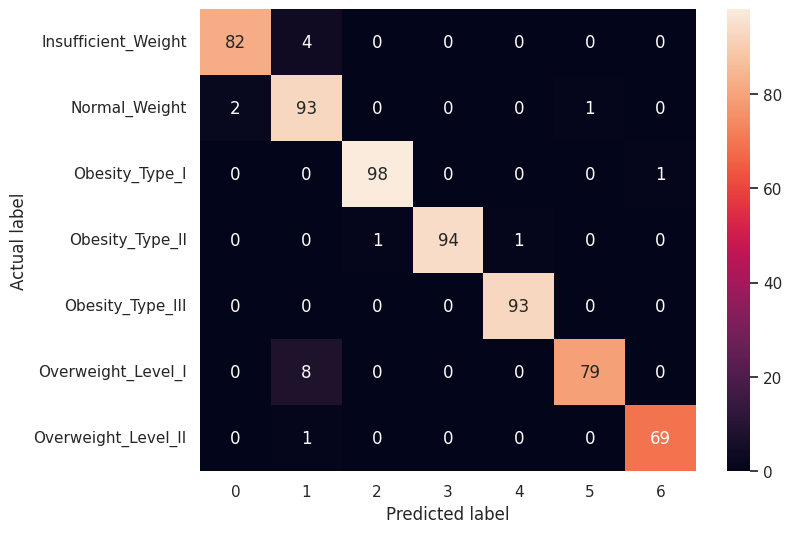



   TEST SCORES
ACCURACY: 0.9697

---------------------------------------------------
FALSE POSITIVES:
2 out of 95 positive labels (0.0211%)

---------------------------------------------------
FALSE NEGATIVES:
4 out of 86 negative labels (0.0465%)

--------------------------------------------------
PRECISION, RECALL, F1 scores:

              precision    recall  f1-score   support

         0.0       0.98      0.95      0.96        86
         1.0       0.88      0.97      0.92        96
         2.0       0.99      0.99      0.99        99
         3.0       1.00      0.98      0.99        96
         4.0       0.99      1.00      0.99        93
         5.0       0.99      0.91      0.95        87
         6.0       0.99      0.99      0.99        70

    accuracy                           0.97       627
   macro avg       0.97      0.97      0.97       627
weighted avg       0.97      0.97      0.97       627



In [ ]:
from sklearn.ensemble import BaggingClassifier
bg = BaggingClassifier(random_state=0)

# parameters 
parameters = {
                
               
                "bootstrap": [True,False],
                "max_features": [0.3, 0.5, 0.7, 0.9, 1],
                "max_samples": [0.3, 0.5, 0.7, 0.9],
                "n_estimators": [10, 100, 200]
                
}

# grid search for parameters
grid_6 = GridSearchCV(estimator=bg, cv=cv,param_grid=parameters, n_jobs=-1)
grid_6.fit(X_train_normalized_df, y_train)

# print best scores
print("The best parameters are %s with a score of %0.4f"
      % (grid_6.best_params_, grid_6.best_score_))

# prediction results
y_pred = grid_6.predict(X_test_normalized_df)

# print accuracy metrics
print("CONFUSION MATRIX:\n")
results, false = display_test_scores(y_test, y_pred)
print(results)